# PROJECT INFORMATION

### Build Unsupervised Learning Models using Python: Clustering

#### Group - 29
#### Priyadarshani Dash- 055033
#### Divyank Harjani - 055010

#### DESCRIPTION OF DATA
### Data Information

- **Data Size:** 2.56 MB  
- **Data Type:** Panel  

### Data Dimension  
- **No. of Variables:** 16  
- **No. of Observations:** 15,000  

---

## Data Variable Type

### Numeric  
- **Integer:** Quantity, Customs_Code, Invoice_Number  
- **Decimal:** Value, Weight  

### Non-Numeric  
Transaction_ID, Customs_Code, Invoice_Number, Product, Supplier, Cu,  Shipping_Method, Countrysomer, Date, Port  

---

## Data Variable Category - I  

### Categorical  
- **Nominal:** Import_Export, Category, Shipping_Method, Payment_Terms, Country  
- **Ordinal:**  

### Non-Categorical  
Quantity, Value, Weight
---

## Data Variable Category - II  

- **Transaction_ID:** Unique identifier for each trade transaction.  
- **Country:** Country of origin or destination for the trade.  
- **Product:** Product being traded.  
- **Import_Export:** Indicates whether the transaction is an import or export.  
- **Quantity:** Amount of the product traded.  
- **Value:** Monetary value of the product in USD.  
- **Date:** Date of the transaction.  
- **Category:** Category of the product (e.g., Electronics, Clothing, Machinery).  
- **Port:** Port of entry or departure.  
- **Customs_Code:** Customs or HS code for product classification.  
- **Weight:** Weight of the product in kilograms.  
- **Shipping_Method:** Method used for shipping (e.g., Air, Sea, Land).  
- **Supplier:** Name of the supplier or manufacturer.  
- **Customer:** Name of the customer or recipient.  
- **Invoice_Number:** Unique invoice number for the transaction.  
- **Payment_Terms:** Terms of payment (e.g., Net 30, Net 60, Cash on Delivery).  

---

## About Dataset  

This dataset provides detailed information on international trade transactions, capturing both import and export activities. It includes comprehensive data on various aspects of trade, making it a valuable resource for business analysis, economic research, and financial modeling.

#### PROJECT OBJECTIVES
## 3. Project Objectives and Problem Statements  

### Project Objectives  
1. Analyze international trade trends, focusing on imports and exports by country and product.
2. Develop predictive models to forecast trade volumes based on historical data.
3. Detect anomalies in trade data for potential fraud or regulatory compliance issues.
4. Provide actionable insights to optimize supply chain logistics and reduce costs.







### Problem Statements  
1. How can trade transactions be classified and categorized using the given variables?
2. What factors influence variations in import and export volumes by country and category?
3. Can we predict future trade volumes for specific products or regions?
4. How do payment terms and shipping methods affect the trade cycle?
5. Are there inconsistencies or anomalies in the dataset that may suggest errors or fraud?

### ANALYSIS OF DATA

### Data Preprocessing

In [ ]:
#Import relevant libraries
import pandas as pd
import statsmodels.stats.descriptivestats as dstats
import numpy as np  # For Data Manipulation
from sklearn.preprocessing import OrdinalEncoder  # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.impute import SimpleImputer  # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # For Rescaling Data
from sklearn.model_selection import train_test_split  # For Splitting Data into Training & Testing Sets
import matplotlib.pyplot as plt
import seaborn as sns  # For Data Visualization
import scipy.cluster.hierarchy as sch  # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score
import statsmodels.api as sm
import io
import requests
from scipy.stats import shapiro
from scipy.stats import spearmanr, kendalltau
from scipy.stats import skew, kurtosis, pearsonr, norm
from scipy.stats import chi2_contingency
from scipy import stats

In [ ]:
import requests
import pandas as pd
import io


pd33_url = 'https://raw.githubusercontent.com/Priyadarshani276/MLM_group_project/main/Imports_Exports_Dataset_2.csv'

# Fetch the file from the correct URL
pd33_response = requests.get(pd33_url)
pd33_response.raise_for_status()  # Raise an exception for bad responses

# Read the CSV data into a pandas DataFrame
pd33_imports_exports = pd.read_csv(io.StringIO(pd33_response.text))

# Display information about the DataFrame
pd33_imports_exports.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Quantity         15000 non-null  int64  
 5   Value            15000 non-null  float64
 6   Date             15000 non-null  object 
 7   Category         15000 non-null  object 
 8   Port             15000 non-null  object 
 9   Customs_Code     15000 non-null  int64  
 10  Weight           15000 non-null  float64
 11  Shipping_Method  15000 non-null  object 
 12  Supplier         15000 non-null  object 
 13  Customer         15000 non-null  object 
 14  Invoice_Number   15000 non-null  int64  
 15  Payment_Terms    15000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 1.8+ MB


In [ ]:
pd33_ds = pd33_imports_exports.sample(n = 5001, random_state=33010)
pd33_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 1074 to 10069
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   5001 non-null   object 
 1   Country          5001 non-null   object 
 2   Product          5001 non-null   object 
 3   Import_Export    5001 non-null   object 
 4   Quantity         5001 non-null   int64  
 5   Value            5001 non-null   float64
 6   Date             5001 non-null   object 
 7   Category         5001 non-null   object 
 8   Port             5001 non-null   object 
 9   Customs_Code     5001 non-null   int64  
 10  Weight           5001 non-null   float64
 11  Shipping_Method  5001 non-null   object 
 12  Supplier         5001 non-null   object 
 13  Customer         5001 non-null   object 
 14  Invoice_Number   5001 non-null   int64  
 15  Payment_Terms    5001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 664.2+ KB


In [ ]:
#Subset of Non-Categorical Variables
pd33_ds_noncat = pd33_ds[['Quantity','Value','Weight']]
pd33_ds_noncat.head()

,Quantity,Value,Weight
1074,8567,9538.12,2853.32
12932,8063,4709.09,3268.40
4843,1479,6188.17,3150.26
4383,1201,7560.83,1312.61
12281,8854,8772.15,836.14


In [ ]:
# Subset of categorical variables
pd33_ds_cat = pd33_ds[['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms']]
pd33_ds_cat.head()

,Import_Export,Category,Shipping_Method,Payment_Terms
1074,Import,Furniture,Air,Prepaid
12932,Export,Electronics,Air,Cash on Delivery
4843,Export,Machinery,Sea,Cash on Delivery
4383,Import,Toys,Land,Net 30
12281,Export,Machinery,Air,Cash on Delivery


In [ ]:
# Handling Missing Data
def missing_data_summary(df):
    """
    Creates a DataFrame summarizing missing data statistics.

    Args:
        df: The input DataFrame.

    Returns:
        A DataFrame with missing data count and percentage for each variable and row.
    """
    # Column-wise summary
    missing_count_col = df.isnull().sum()
    missing_percentage_col = (missing_count_col / len(df)) * 100
    missing_summary_col = pd.DataFrame({
        'Missing Count': missing_count_col,
        'Missing Percentage': missing_percentage_col
    })
    # Row-wise summary
    missing_count_row = df.isnull().sum(axis=1)
    missing_percentage_row = (missing_count_row / len(df.columns)) * 100
    missing_summary_row = pd.DataFrame({
        'Missing Count': missing_count_row,
        'Missing Percentage': missing_percentage_row
    }, index=df.index)  # Use original DataFrame index

    return missing_summary_col, missing_summary_row

# Calculate missing data summary for categorical subset
pd33_missing_summary_cat_col, pd33_missing_summary_cat_row = missing_data_summary(pd33_ds_cat)

# Calculate missing data summary for non-categorical subset
pd33_missing_summary_noncat_col, pd33_missing_summary_noncat_row = missing_data_summary(pd33_ds_noncat)

# Drop columns and rows with more than 50% missing data for categorical subset
pd33_ds_cat_treated = pd33_ds_cat.dropna(thresh=len(pd33_ds_cat) * 0.5, axis=1)
pd33_ds_cat_treated = pd33_ds_cat_treated.dropna(thresh=len(pd33_ds_cat_treated.columns) * 0.5, axis=0)

# Drop columns and rows with more than 50% missing data for non-categorical subset
pd33_ds_noncat_treated = pd33_ds_noncat.dropna(thresh=len(pd33_ds_noncat) * 0.5, axis=1)
pd33_ds_noncat_treated = pd33_ds_noncat_treated.dropna(thresh=len(pd33_ds_noncat_treated.columns) * 0.5, axis=0)

# Calculate total variables and rows dropped
pd33_dropped_variables_cat = len(pd33_ds_cat.columns) - len(pd33_ds_cat_treated.columns)
pd33_dropped_rows_cat = len(pd33_ds_cat) - len(pd33_ds_cat_treated)
pd33_dropped_variables_noncat = len(pd33_ds_noncat.columns) - len(pd33_ds_noncat_treated.columns)
pd33_dropped_rows_noncat = len(pd33_ds_noncat) - len(pd33_ds_noncat_treated)

pd33_total_dropped_variables = pd33_dropped_variables_cat + pd33_dropped_variables_noncat
pd33_total_dropped_rows = pd33_dropped_rows_cat + pd33_dropped_rows_noncat

# Print missing data summaries
print("Categorical Missing Data Summary (Columns):")
print(pd33_missing_summary_cat_col)
print("\nCategorical Missing Data Summary (Rows):")
print(pd33_missing_summary_cat_row)
print("\nNon-Categorical Missing Data Summary (Columns):")
print(pd33_missing_summary_noncat_col)
print("\nNon-Categorical Missing Data Summary (Rows):")
print(pd33_missing_summary_noncat_row)

# Print total dropped variables and rows
print(f"\nTotal variables dropped: {pd33_total_dropped_variables}")
print(f"Total rows dropped: {pd33_total_dropped_rows}")

Categorical Missing Data Summary (Columns):
                 Missing Count  Missing Percentage
Import_Export                0                 0.0
Category                     0                 0.0
Shipping_Method              0                 0.0
Payment_Terms                0                 0.0

Categorical Missing Data Summary (Rows):
       Missing Count  Missing Percentage
1074               0                 0.0
12932              0                 0.0
4843               0                 0.0
4383               0                 0.0
12281              0                 0.0
...              ...                 ...
4211               0                 0.0
9750               0                 0.0
10168              0                 0.0
6244               0                 0.0
10069              0                 0.0

[5001 rows x 2 columns]

Non-Categorical Missing Data Summary (Columns):
          Missing Count  Missing Percentage
Quantity              0                 0.0
Value

In [ ]:
from sklearn.impute import SimpleImputer

# Create imputers for categorical and non-categorical data
pd33_imputer_cat = SimpleImputer(strategy='most_frequent')  # Mode for categorical
pd33_imputer_noncat = SimpleImputer(strategy='mean')  # Mean for non-categorical

# Fit and transform imputers on the treated datasets
pd33_ds_cat_imputed = pd.DataFrame(pd33_imputer_cat.fit_transform(pd33_ds_cat_treated),
                                  columns=pd33_ds_cat_treated.columns,
                                  index=pd33_ds_cat_treated.index)
pd33_ds_noncat_imputed = pd.DataFrame(pd33_imputer_noncat.fit_transform(pd33_ds_noncat_treated),
                                    columns=pd33_ds_noncat_treated.columns,
                                    index=pd33_ds_noncat_treated.index)

# Count imputed values
pd33_imputed_count_cat = pd33_ds_cat_imputed.isnull().sum().sum() - pd33_ds_cat_treated.isnull().sum().sum()
pd33_imputed_count_noncat = pd33_ds_noncat_imputed.isnull().sum().sum() - pd33_ds_noncat_treated.isnull().sum().sum()

# Print head of imputed datasets
print("Imputed Categorical Dataset:")
print(pd33_ds_cat_imputed.head())

print("\nHead of Imputed Non-Categorical Dataset:")
print(pd33_ds_noncat_imputed.head())

# Print count of imputed values
print(f"\nNumber of imputed values in categorical dataset: {pd33_imputed_count_cat}")
print(f"Number of imputed values in non-categorical dataset: {pd33_imputed_count_noncat}")

Imputed Categorical Dataset:
      Import_Export     Category Shipping_Method     Payment_Terms
1074         Import    Furniture             Air           Prepaid
12932        Export  Electronics             Air  Cash on Delivery
4843         Export    Machinery             Sea  Cash on Delivery
4383         Import         Toys            Land            Net 30
12281        Export    Machinery             Air  Cash on Delivery

Head of Imputed Non-Categorical Dataset:
       Quantity    Value   Weight
1074     8567.0  9538.12  2853.32
12932    8063.0  4709.09  3268.40
4843     1479.0  6188.17  3150.26
4383     1201.0  7560.83  1312.61
12281    8854.0  8772.15   836.14

Number of imputed values in categorical dataset: 0
Number of imputed values in non-categorical dataset: 0


1. **Assessment of Missing Data:**
   - Perform a detailed analysis to identify the extent of missing data across columns and rows in the dataset.

2. **Removal of Data:**
   - If more than **50%** of the data is missing in any column or row, it will be removed to ensure the integrity and reliability of the analysis.

3. **Imputation of Missing Values:**
   - For columns or rows with less than **50%** missing data, imputation techniques will be applied:
   - **Categorical Variables:** Missing values will be replaced using the **mode** (most frequently occurring value) to maintain consistency.
   - **Numerical Variables:** Missing values will be replaced using the **mean** (average value) to minimize bias in the dataset.

4. **Rationale for Approach:**
   - This strategy ensures a balance between preserving valuable information and maintaining the quality and reliability of the dataset. By applying tailored imputation techniques based on variable types, we aim to reduce the impact of missing data on subsequent analyses.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Encoding
# Select categorical columns with text data
pd33_categorical_cols_text = pd33_ds_cat_imputed.select_dtypes(include=['object']).columns

# Create OrdinalEncoder
pd33_encoder = OrdinalEncoder()

# Fit and transform encoder on selected columns
pd33_ds_cat_encoded = pd33_ds_cat_imputed.copy()  # Create a copy to avoid modifying the original
pd33_ds_cat_encoded[pd33_categorical_cols_text] = pd33_encoder.fit_transform(pd33_ds_cat_imputed[pd33_categorical_cols_text])

# Display encoded dataset
print("\nEncoded Categorical Dataset:")
print(pd33_ds_cat_encoded.head())



Encoded Categorical Dataset:
       Import_Export  Category  Shipping_Method  Payment_Terms
1074             1.0       2.0              0.0            3.0
12932            0.0       1.0              0.0            0.0
4843             0.0       3.0              2.0            0.0
4383             1.0       4.0              1.0            1.0
12281            0.0       3.0              0.0            0.0


In [ ]:
# Display encoding mapping
for col in pd33_categorical_cols_text:
    print(f"\nEncoding Mapping for {col}:")
    for i, category in enumerate(pd33_encoder.categories_[pd33_categorical_cols_text.get_loc(col)]):
      print(f"{category} -> {i}")


Encoding Mapping for Import_Export:
Export -> 0
Import -> 1

Encoding Mapping for Category:
Clothing -> 0
Electronics -> 1
Furniture -> 2
Machinery -> 3
Toys -> 4

Encoding Mapping for Shipping_Method:
Air -> 0
Land -> 1
Sea -> 2

Encoding Mapping for Payment_Terms:
Cash on Delivery -> 0
Net 30 -> 1
Net 60 -> 2
Prepaid -> 3


## Encoding Mapping Analysis

####Import_Export:

Export → 0: Exports are encoded as 0, which signifies goods leaving the country.
Import → 1: Imports are encoded as 1, representing goods entering the country.
Purpose: The binary encoding allows for quick differentiation between export and import transactions, which can be critical in analyzing trade flows.

####Category:

Clothing → 0
Electronics → 1
Furniture → 2
Machinery → 3
Toys → 4

Purpose: This encoding groups trade products into distinct categories for analysis. The numeric encoding helps to treat categorical data numerically, making it easier to perform machine learning or statistical analysis. The choice of categories appears to cover a wide range of common trade goods, allowing for focused analysis by product type.

####Shipping_Method:

Air → 0
Land → 1
Sea → 2

Purpose: Shipping methods are encoded numerically to capture the mode of transportation. This encoding is useful for evaluating factors like transportation costs, time efficiency, and environmental impact, which may vary by shipping method.

####Payment_Terms:

Cash on Delivery → 0
Net 30 → 1
Net 60 → 2

Prepaid → 3
Purpose: Payment terms are encoded to track how payments are made in trade transactions. This helps assess the financial flow, risk, and payment behavior across different transactions. For example, "Prepaid" (3) might indicate more immediate cash flow, while "Net 60" (2) may indicate longer payment cycles and a potential risk factor.

####Overall Analysis:
The encoding mappings for Import_Export, Category, Shipping_Method, and Payment_Terms use numeric values to simplify categorical data, allowing for efficient analysis and modeling. This numeric representation enables easy identification of trends, correlations, and patterns within trade data.

In [ ]:
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Check normality using Shapiro-Wilk test
pd33_normality_results = {}
for col in pd33_ds_noncat_imputed.columns:
    _, p_value = shapiro(pd33_ds_noncat_imputed[col])
    pd33_normality_results[col] = p_value

# Identify non-normally distributed variables
pd33_non_normal_vars = [col for col, p_value in pd33_normality_results.items() if p_value < 0.05]

# Scale non-normally distributed variables using MinMaxScaler
pd33_scaler = MinMaxScaler()
pd33_ds_noncat_scaled = pd33_ds_noncat_imputed.copy()  # Create a copy to avoid modifying the original
pd33_ds_noncat_scaled[pd33_non_normal_vars] = pd33_scaler.fit_transform(pd33_ds_noncat_imputed[pd33_non_normal_vars])

# Display scaled dataset
print("\nScaled Non-Categorical Dataset:")
print(pd33_ds_noncat_scaled.head())

# Display scaled variables
print("\nVariables that were scaled:")
print(pd33_non_normal_vars)


Scaled Non-Categorical Dataset:
       Quantity     Value    Weight
1074   0.856628  0.953416  0.570842
12932  0.806203  0.465451  0.653901
4843   0.147474  0.614909  0.630261
4383   0.119660  0.753614  0.262542
12281  0.885343  0.876016  0.167200

Variables that were scaled:
['Quantity', 'Value', 'Weight']


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5001.
  res = hypotest_fun_out(*samples, **kwds)


## Analysis of Non-Normally Distributed Variables and Scaling

####Non-Normally Distributed Variables:
The Shapiro-Wilk test was used to identify non-normally distributed variables.
The analysis revealed that Quantity, Value, and Weight all do not follow a normal distribution, as indicated by p-values less than 0.05 for each.

####Scaling with MinMaxScaler:
To address the non-normal distribution, the MinMaxScaler was applied to these variables.
The transformation scales the data to a range between 0 and 1, ensuring equal treatment of variables during modeling.
This scaling is particularly beneficial for algorithms sensitive to feature scaling, such as linear regression and k-means clustering.
Scaled Non-Categorical Dataset:
After scaling, the Quantity, Value, and Weight variables now lie within the [0, 1] range, as shown in the initial rows of the transformed dataset.

####Scaled Variables:
The scaling process has effectively standardized the variables, making them ready for use in machine learning models.









In [ ]:
# Merge encoded categorical and scaled non-categorical datasets into original dataset
pd33_ds_preprocessed = pd33_ds.copy()  # Create a copy of the original dataset

# Replace categorical columns with encoded values
pd33_ds_preprocessed[pd33_ds_cat_encoded.columns] = pd33_ds_cat_encoded

# Replace non-categorical columns with scaled values
pd33_ds_preprocessed[pd33_ds_noncat_scaled.columns] = pd33_ds_noncat_scaled

pd33_ds_preprocessed.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
1074,832d5e70-777c-4128-9f51-9184e79d4d5f,Tuvalu,try,1.0,0.856628,0.953416,03-02-2021,2.0,New Patrickchester,937681,0.570842,0.0,Lee Inc,Hayley Williams,5946793,3.0
12932,473c0329-b13f-4b56-8700-f38bfc359d66,British Virgin Islands,purpose,0.0,0.806203,0.465451,03-09-2024,1.0,Port Lindsay,563635,0.653901,0.0,"Dillon, Levy and Maddox",Jack Baker,25423163,0.0
4843,17896f55-996e-4deb-af24-c62249a17c2f,Gibraltar,fund,0.0,0.147474,0.614909,24-03-2021,3.0,Traceystad,809145,0.630261,2.0,Weber-Petersen,Allison Keller,17797085,0.0
4383,8b4aa71d-9b73-494e-83ff-eb8188c9a3a5,Kiribati,subject,1.0,0.119660,0.753614,09-01-2020,4.0,Lake Sara,119984,0.262542,1.0,Hahn Group,David Rush,39742799,1.0
12281,20bbfa13-ecd7-4a34-a578-5cde3ea1b50c,Japan,control,0.0,0.885343,0.876016,10-01-2022,3.0,West Ashley,153864,0.167200,0.0,Taylor-Nunez,Brianna Gardner,51914195,0.0


### Descriptive Statistics

In [ ]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau

# Function to calculate descriptive statistics for categorical variables
def pd33_categorical_stats(df, cat_columns):
    pd33_results = []  # Corrected indentation

    for pd33_col in cat_columns:
        pd33_counts = df[pd33_col].value_counts()
        pd33_proportions = pd33_counts / len(df)
        pd33_mode = pd33_counts.idxmax()

        for category, count in pd33_counts.items():
            pd33_results.append({
                "Column": pd33_col,
                "Category": category,
                "Frequency": count,
                "Proportion": pd33_proportions[category],
                "Mode": pd33_mode
            })

    return pd.DataFrame(pd33_results)

# Function to calculate correlation for categorical columns
def pd33_categorical_correlation(df, cat_columns, method='spearman'):
    pd33_corr_results = pd.DataFrame(index=cat_columns, columns=cat_columns, dtype=float)

    for i in range(len(cat_columns)):
        for j in range(i, len(cat_columns)):
            pd33_col1, pd33_col2 = cat_columns[i], cat_columns[j]
            if i == j:
                # Perfect correlation for the same variable
                corr = 1.0
            else:
                if method == 'spearman':
                    corr, _ = spearmanr(df[pd33_col1].astype('category').cat.codes,
                                        df[pd33_col2].astype('category').cat.codes)
                elif method == 'kendall':
                    corr, _ = kendalltau(df[pd33_col1].astype('category').cat.codes,
                                         df[pd33_col2].astype('category').cat.codes)
            pd33_corr_results.loc[pd33_col1, pd33_col2] = corr
            pd33_corr_results.loc[pd33_col2, pd33_col1] = corr

    return pd33_corr_results

# Retrieve categorical columns
pd33_cat_columns = pd33_ds_preprocessed.columns.tolist()  # Adjust variable name

# Generate descriptive stats and correlations for these columns
pd33_categorical_stats_df = pd33_categorical_stats(pd33_ds_preprocessed, pd33_cat_columns)
pd33_spearman_corr_df = pd33_categorical_correlation(pd33_ds_preprocessed, pd33_cat_columns, method='spearman')
pd33_kendall_corr_df = pd33_categorical_correlation(pd33_ds_preprocessed, pd33_cat_columns, method='kendall')

# Ensure diagonal elements are correct (although this step should not be needed)
pd33_spearman_corr_df.fillna(1, inplace=True)
pd33_kendall_corr_df.fillna(1, inplace=True)

# Display results
print("Descriptive Statistics:")
print(pd33_categorical_stats_df)

print("\nSpearman Correlation:")
print(pd33_spearman_corr_df)

print("\nKendall Correlation:")
print(pd33_kendall_corr_df)


Descriptive Statistics:
               Column                              Category  Frequency  \
0      Transaction_ID  832d5e70-777c-4128-9f51-9184e79d4d5f          1   
1      Transaction_ID  c08c45ef-ce37-46b3-a6aa-fd1b841e8c4e          1   
2      Transaction_ID  5ca5fbfd-2dee-424f-8f2e-7e186853dcc9          1   
3      Transaction_ID  0ebb9133-0376-4795-873c-238bd9d013b8          1   
4      Transaction_ID  f2533686-697e-4308-a6d5-560e075dc4c3          1   
...               ...                                   ...        ...   
45457  Invoice_Number                              90743316          1   
45458   Payment_Terms                                   2.0       1314   
45459   Payment_Terms                                   0.0       1278   
45460   Payment_Terms                                   3.0       1219   
45461   Payment_Terms                                   1.0       1190   

       Proportion                                  Mode  
0        0.000200  832d5e70-7

### Descriptive Statistics for Categorical Variables

#### 1. **Import_Export (Trade Type)**
**Spearman Correlation:** There is a very weak positive correlation between Import_Export and other variables such as Quantity (0.01) and Product (0.0089). The correlation with Value is also very weak (-0.0058), indicating that the type of trade (import or export) does not have a significant impact on these variables.

**Kendall Correlation:** The Import_Export variable also shows very weak positive correlations with Quantity (0.0084) and Product (0.0073), confirming that the type of trade (import/export) has a minimal influence on these variables.

**Conclusion:** The Import_Export variable appears to be relatively independent of key features like quantity, product, and value, suggesting that trade type is not strongly associated with these variables in the dataset.

---

#### 2. **Category (Product Type)**
**Spearman Correlation:** The Category variable shows weak correlations with several other features, including Product (0.0146) and Weight (0.0020). The correlation with Quantity (0.0036) and Value (0.0005) is also weak.

**Kendall Correlation:** Similar to Spearman, Category shows weak positive correlations with Product (0.0107) and Weight (0.0014), but no significant relationship with Quantity (-0.0037) or Value (0.0003).

**Conclusion:** The Category of products (such as clothing, electronics, machinery, etc.) is weakly correlated with other variables, suggesting that product types have a minor impact on trade-related attributes such as quantity, weight, and value.

---

#### 3. **Shipping_Method**
**Spearman Correlation:** The Shipping_Method variable is weakly negatively correlated with Weight (-0.0215) and Quantity (-0.0215), indicating a slight inverse relationship. The correlation with Value (0.0291) is also weakly positive.

**Kendall Correlation:** Similar to Spearman, Shipping_Method shows a weak negative correlation with Quantity (-0.0166) and a slightly stronger positive correlation with Value (0.0225).

**Conclusion:** The Shipping_Method (air, land, sea) has weak associations with other variables, suggesting that shipping mode does not significantly affect trade volume, weight, or value. However, the slightly positive correlation with Value could imply that air shipping may be more closely linked with higher-value goods.

---

#### 4. **Payment_Terms**
**Spearman Correlation:** The Payment_Terms variable shows weak negative correlations with Quantity (-0.0259) and Value (-0.0186), and weak positive correlations with Category (0.0154) and Product (0.0068).

**Kendall Correlation:** The negative correlation with Quantity (-0.0194) is slightly more pronounced in Kendall’s test. Payment_Terms also shows weak positive correlations with Product (0.0051) and Category (0.0126), but no significant correlation with Weight.

**Conclusion:** Payment_Terms (e.g., Cash on Delivery, Net 30) appear to have a weak but slightly negative impact on Quantity and Value, suggesting that payment terms could be more relevant for specific products or types of transactions. However, the weak correlations indicate that the influence of payment terms on trade transactions is minimal overall.

---

### Summary of Insights
**Import_Export:** The trade type (import or export) has minimal influence on other variables such as product type, quantity, value, or shipping method.

**Category:** Product categories show weak correlations with trade attributes, suggesting that the type of product has little effect on quantity, weight, or value in this dataset.

**Shipping_Method:** The shipping method has weak correlations with trade variables, with a slight positive association with value, possibly indicating that higher-value goods are more likely to be shipped via air.

**Payment_Terms:** Payment terms show weak correlations with trade variables. There may be a minor influence on quantity and value, but the overall effect is not significant.

These descriptive statistics help understand the distribution and characteristics of categorical variables, which are crucial for further analysis and modeling.


In [ ]:
import pandas as pd
import statsmodels.stats.descriptivestats as dstats
import numpy as np  # For Data Manipulation
from sklearn.preprocessing import OrdinalEncoder  # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.impute import SimpleImputer  # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # For Rescaling Data
from sklearn.model_selection import train_test_split  # For Splitting Data into Training & Testing Sets
import matplotlib.pyplot as plt
import seaborn as sns  # For Data Visualization
import scipy.cluster.hierarchy as sch  # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score
import statsmodels.api as sm
import io
import requests
from scipy.stats import shapiro
from scipy.stats import spearmanr, kendalltau
from scipy.stats import skew, kurtosis, pearsonr, norm
from scipy.stats import chi2_contingency
from scipy import stats
# Descriptive Stats for Noncat Variables

# Function to calculate descriptive statistics for numerical variables
def pd33_numerical_stats(df, num_columns):
    pd33_results = []

    for pd33_col in num_columns:
        pd33_data = df[pd33_col].dropna()  # Exclude NaN values
        pd33_min = pd33_data.min()
        pd33_max = pd33_data.max()
        pd33_mean = pd33_data.mean()
        pd33_median = pd33_data.median()
        pd33_mode = pd33_data.mode().iloc[0] if not pd33_data.mode().empty else np.nan
        pd33_range = pd33_max - pd33_min
        pd33_std_dev = pd33_data.std()
        pd33_skewness = skew(pd33_data)
        pd33_kurt = kurtosis(pd33_data)

        # Coefficient of Variation (CV)
        pd33_cv = pd33_std_dev / pd33_mean if pd33_mean != 0 else np.nan

        # Confidence Interval (95%)
        pd33_conf_interval = norm.interval(0.95, loc=pd33_mean, scale=pd33_std_dev / np.sqrt(len(pd33_data)))

        # Add results
        pd33_results.append({
            "Column": pd33_col,
            "Minimum": pd33_min,
            "Maximum": pd33_max,
            "Mean": pd33_mean,
            "Median": pd33_median,
            "Mode": pd33_mode,
            "Range": pd33_range,
            "Standard Deviation": pd33_std_dev,
            "Skewness": pd33_skewness,
            "Kurtosis": pd33_kurt,
            "Coefficient of Variation": pd33_cv,
            "Confidence Interval (95%)": pd33_conf_interval
        })

    return pd.DataFrame(pd33_results)

# Function to calculate correlation for numerical variables
def pd33_numerical_correlation(df, num_columns, method='pearson'):
    pd33_corr_results = pd.DataFrame(index=num_columns, columns=num_columns, dtype=float)

    for i in range(len(num_columns)):
        for j in range(i, len(num_columns)):
            pd33_col1, pd33_col2 = num_columns[i], num_columns[j]
            if i == j:
                corr = 1.0  # Perfect correlation for the same variable
            else:
                if method == 'pearson':
                    corr, _ = pearsonr(df[pd33_col1].dropna(), df[pd33_col2].dropna())
                elif method == 'spearman':
                    corr, _ = spearmanr(df[pd33_col1].dropna(), df[pd33_col2].dropna())
            pd33_corr_results.loc[pd33_col1, pd33_col2] = corr
            pd33_corr_results.loc[pd33_col2, pd33_col1] = corr

    return pd33_corr_results

# Retrieve numerical columns from pd33_ds_noncat_scaled
pd33_num_columns = pd33_ds_noncat_scaled.columns.tolist()

# Generate statistics and correlations for these columns
pd33_numerical_stats_df = pd33_numerical_stats(pd33_ds_noncat_scaled, pd33_num_columns)
pd33_pearson_corr_df = pd33_numerical_correlation(pd33_ds_noncat_scaled, pd33_num_columns, method='pearson')
pd33_spearman_corr_df = pd33_numerical_correlation(pd33_ds_noncat_scaled, pd33_num_columns, method='spearman')

# Replace NaN correlations with 1 for diagonal elements (if any remain)
pd33_pearson_corr_df.fillna(1, inplace=True)
pd33_spearman_corr_df.fillna(1, inplace=True)

# Display results
print("Numerical Statistics:")
print(pd33_numerical_stats_df)

print("\nPearson Correlation:")
print(pd33_pearson_corr_df)

print("\nSpearman Correlation:")
print(pd33_spearman_corr_df)


Numerical Statistics:
     Column  Minimum  Maximum      Mean    Median      Mode  Range  \
0  Quantity      0.0      1.0  0.494611  0.491946  0.173087    1.0   
1     Value      0.0      1.0  0.499958  0.502363  0.014042    1.0   
2    Weight      0.0      1.0  0.501814  0.499128  0.108752    1.0   

   Standard Deviation  Skewness  Kurtosis  Coefficient of Variation  \
0            0.287941  0.040588 -1.198773                  0.582157   
1            0.286723 -0.002431 -1.176474                  0.573494   
2            0.291840  0.008885 -1.214203                  0.581569   

                   Confidence Interval (95%)  
0   (0.4866304348661072, 0.5025911905436783)  
1  (0.49201187561127446, 0.5079051168982941)  
2   (0.4937253378778646, 0.5099021814796327)  

Pearson Correlation:
          Quantity     Value    Weight
Quantity  1.000000  0.002390  0.013178
Value     0.002390  1.000000  0.014854
Weight    0.013178  0.014854  1.000000

Spearman Correlation:
          Quantity     

### Data Visualisation

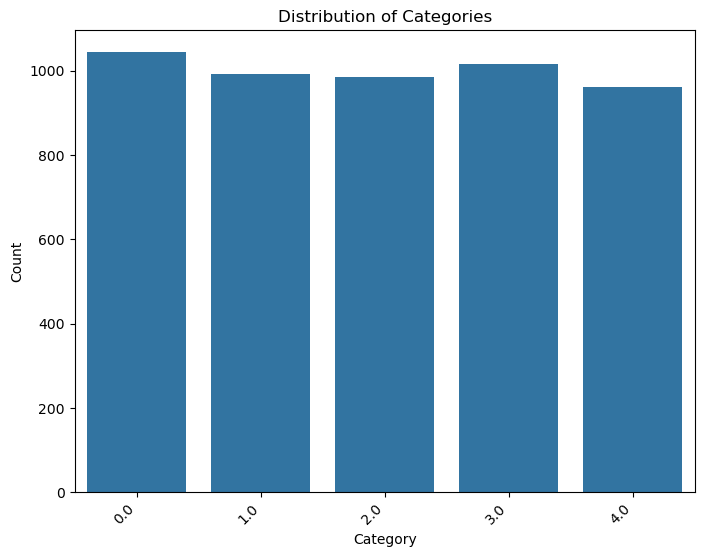

In [ ]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=pd33_ds_preprocessed)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

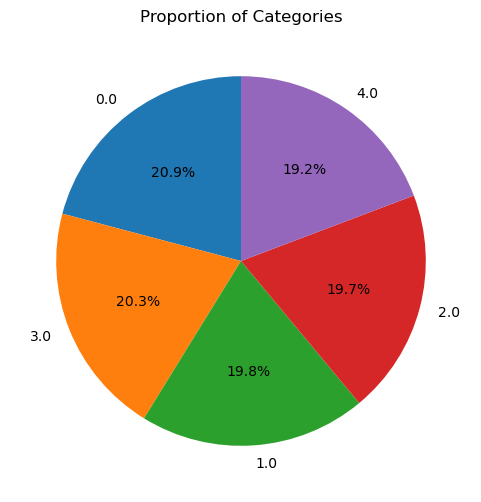

In [ ]:
# Pie Chart
plt.figure(figsize=(6, 6))
pd33_category_counts = pd33_ds_preprocessed['Category'].value_counts()
plt.pie(pd33_category_counts, labels=pd33_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Categories')
plt.show()

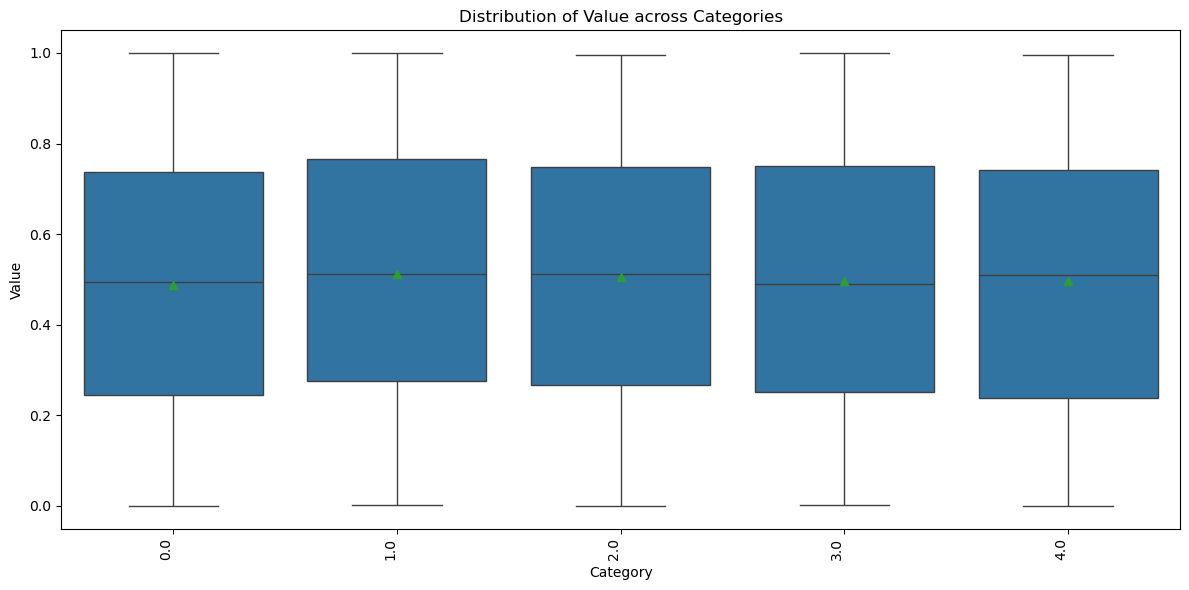

In [ ]:
# Box-Whisker Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Value', data=pd33_ds_preprocessed, order=sorted(pd33_ds_preprocessed['Category'].unique()),
            showmeans=True,  # Show median dot
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})  # Customize outliers
plt.title('Distribution of Value across Categories')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

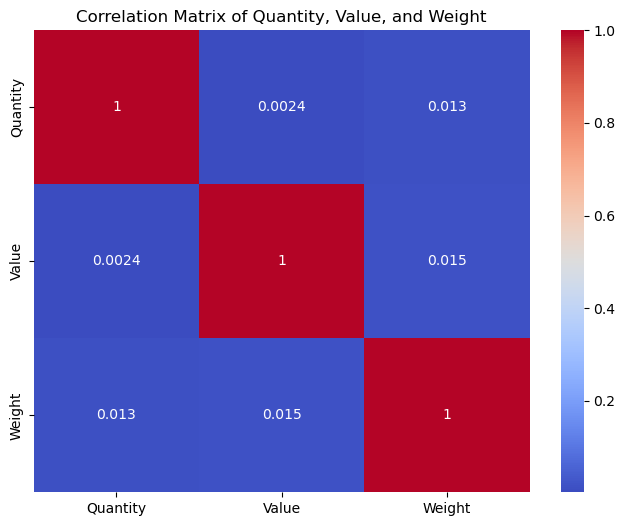

In [ ]:
# Heatmap
plt.figure(figsize=(8, 6))
pd33_correlation_matrix = pd33_ds_preprocessed[['Quantity', 'Value', 'Weight']].corr()
sns.heatmap(pd33_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Quantity, Value, and Weight')
plt.show()

### Inferential Statistics

In [ ]:
# Select the two categorical variables for the test
pd33_categorical_var1 = 'Import_Export'
pd33_categorical_var2 = 'Shipping_Method'

# Create a contingency table
pd33_contingency_table = pd.crosstab(pd33_ds_preprocessed[pd33_categorical_var1],
                                     pd33_ds_preprocessed[pd33_categorical_var2])

# Print the contingency table
print("Contingency Table:")
print(pd33_contingency_table)


# Perform the Chi-squared test
pd33_chi2_stat, pd33_p_value, pd33_dof, pd33_expected_freq = chi2_contingency(pd33_contingency_table)

# Print the results
print(f"Chi-squared statistic: {pd33_chi2_stat}")
print(f"P-value: {pd33_p_value}")
print(f"Degrees of freedom: {pd33_dof}")
print("Expected frequencies:")
print(pd33_expected_freq)

# Interpret the results
pd33_alpha = 0.05  # Significance level
if pd33_p_value < pd33_alpha:
    print("Reject the null hypothesis. There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between the variables.")


Contingency Table:
Shipping_Method  0.0  1.0  2.0
Import_Export                 
0.0              825  817  888
1.0              816  855  800
Chi-squared statistic: 4.805282267112835
P-value: 0.09047867118590121
Degrees of freedom: 2
Expected frequencies:
[[830.17996401 845.86282743 853.95720856]
 [810.82003599 826.13717257 834.04279144]]
Fail to reject the null hypothesis. There is no significant association between the variables.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming your preprocessed dataset is named 'pd33_ds_preprocessed'
# and your non-categorical columns are 'Quantity', 'Value', 'Weight'

# List of non-categorical variables
pd33_non_categorical_vars = ['Quantity', 'Value', 'Weight']

# Loop through each variable
for pd33_var in pd33_non_categorical_vars:
    print(f"\n--- Tests for {pd33_var} ---")

    # Shapiro-Wilk Test
    pd33_shapiro_stat, pd33_shapiro_p_value = stats.shapiro(pd33_ds_preprocessed[pd33_var])
    print(f"Shapiro-Wilk Test - Statistic: {pd33_shapiro_stat}, P-value: {pd33_shapiro_p_value}")
    if pd33_shapiro_p_value < 0.05:
        print(f"Data does not look normal (reject H0) at 5% significance level")
    else:
        print(f"Data looks normal (fail to reject H0) at 5% significance level")

    # Kolmogorov-Smirnov Test
    pd33_ks_stat, pd33_ks_p_value = stats.kstest(pd33_ds_preprocessed[pd33_var], 'norm')
    print(f"Kolmogorov-Smirnov Test - Statistic: {pd33_ks_stat}, P-value: {pd33_ks_p_value}")
    if pd33_ks_p_value < 0.05:
        print(f"Data does not look normal (reject H0) at 5% significance level")
    else:
        print(f"Data looks normal (fail to reject H0) at 5% significance level")

    # Anderson-Darling Test
    pd33_anderson_result = stats.anderson(pd33_ds_preprocessed[pd33_var])
    print("Anderson-Darling Test - Statistic:", pd33_anderson_result.statistic)
    # Check only for 5% significance level
    if pd33_anderson_result.statistic < pd33_anderson_result.critical_values[2]:  # Index 2 corresponds to 5%
        print(f"Data looks normal (fail to reject H0) at 5% significance level")
    else:
        print(f"Data does not look normal (reject H0) at 5% significance level")

    # Jarque-Bera Test
    pd33_jb_stat, pd33_jb_p_value = stats.jarque_bera(pd33_ds_preprocessed[pd33_var])
    print(f"Jarque-Bera Test - Statistic: {pd33_jb_stat}, P-value: {pd33_jb_p_value}")
    if pd33_jb_p_value < 0.05:
        print(f"Data does not look normal (reject H0) at 5% significance level")
    else:
        print(f"Data looks normal (fail to reject H0) at 5% significance level")



--- Tests for Quantity ---
Shapiro-Wilk Test - Statistic: 0.9560602942343872, P-value: 2.211154661072104e-36
Data does not look normal (reject H0) at 5% significance level
Kolmogorov-Smirnov Test - Statistic: 0.5000395316360107, P-value: 0.0
Data does not look normal (reject H0) at 5% significance level
Anderson-Darling Test - Statistic: 53.81754053547138
Data does not look normal (reject H0) at 5% significance level
Jarque-Bera Test - Statistic: 295.1810823455319, P-value: 7.984401867490973e-65
Data does not look normal (reject H0) at 5% significance level

--- Tests for Value ---
Shapiro-Wilk Test - Statistic: 0.9538376701537308, P-value: 4.2790215683025695e-37
Data does not look normal (reject H0) at 5% significance level
Kolmogorov-Smirnov Test - Statistic: 0.5, P-value: 0.0
Data does not look normal (reject H0) at 5% significance level
Anderson-Darling Test - Statistic: 56.00457710698538
Data does not look normal (reject H0) at 5% significance level
Jarque-Bera Test - Statistic: 

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5001.
  res = hypotest_fun_out(*samples, **kwds)


### Unsupervised Machine Learning

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import Birch

# Assuming your preprocessed dataset is named 'pd33_ds_preprocessed'
# and your non-categorical columns are 'Quantity', 'Value', 'Weight'

# List of non-categorical variables
pd33_non_categorical_vars = ['Quantity', 'Value', 'Weight']

# Loop through each variable
for pd33_var in pd33_non_categorical_vars:
    print(f"\n--- Tests for {pd33_var} ---")

    # Shapiro-Wilk Test
    pd33_shapiro_stat, pd33_shapiro_p_value = stats.shapiro(pd33_ds_preprocessed[pd33_var])
    print(f"Shapiro-Wilk Test - Statistic: {pd33_shapiro_stat}, P-value: {pd33_shapiro_p_value}")
    if pd33_shapiro_p_value < 0.05:
        print(f"Data does not look normal (reject H0) at 5% significance level")
    else:
        print(f"Data looks normal (fail to reject H0) at 5% significance level")

    # Kolmogorov-Smirnov Test
    pd33_ks_stat, pd33_ks_p_value = stats.kstest(pd33_ds_preprocessed[pd33_var], 'norm')
    print(f"Kolmogorov-Smirnov Test - Statistic: {pd33_ks_stat}, P-value: {pd33_ks_p_value}")
    if pd33_ks_p_value < 0.05:
        print(f"Data does not look normal (reject H0) at 5% significance level")
    else:
        print(f"Data looks normal (fail to reject H0) at 5% significance level")

    # Anderson-Darling Test
    pd33_anderson_result = stats.anderson(pd33_ds_preprocessed[pd33_var])
    print("Anderson-Darling Test - Statistic:", pd33_anderson_result.statistic)
    # Check only for 5% significance level
    if pd33_anderson_result.statistic < pd33_anderson_result.critical_values[2]:  # Index 2 corresponds to 5%
        print(f"Data looks normal (fail to reject H0) at 5% significance level")
    else:
        print(f"Data does not look normal (reject H0) at 5% significance level")

    # Jarque-Bera Test
    pd33_jb_stat, pd33_jb_p_value = stats.jarque_bera(pd33_ds_preprocessed[pd33_var])
    print(f"Jarque-Bera Test - Statistic: {pd33_jb_stat}, P-value: {pd33_jb_p_value}")
    if pd33_jb_p_value < 0.05:
        print(f"Data does not look normal (reject H0) at 5% significance level")
    else:
        print(f"Data looks normal (fail to reject H0) at 5% significance level")

# Select relevant columns for clustering
pd33_cluster_data = pd33_ds_preprocessed[['Quantity', 'Value', 'Weight']]

# Store results
pd33_results = []

# Loop through different cluster numbers
for pd33_n_clusters in range(2, 6):
    # Hierarchical Clustering
    pd33_hc = AgglomerativeClustering(n_clusters=pd33_n_clusters, metric='euclidean', linkage='ward')
    pd33_hc_labels = pd33_hc.fit_predict(pd33_cluster_data)
    pd33_results.append(['HC', pd33_n_clusters, silhouette_score(pd33_cluster_data, pd33_hc_labels),
                         davies_bouldin_score(pd33_cluster_data, pd33_hc_labels)])

    # K-Means Clustering
    pd33_kmeans = KMeans(n_clusters=pd33_n_clusters, random_state=11006)
    pd33_kmeans_labels = pd33_kmeans.fit_predict(pd33_cluster_data)
    pd33_results.append(['KM', pd33_n_clusters, silhouette_score(pd33_cluster_data, pd33_kmeans_labels),
                         davies_bouldin_score(pd33_cluster_data, pd33_kmeans_labels)])

    # BIRCH Clustering
    pd33_birch = Birch(n_clusters=pd33_n_clusters)
    pd33_birch_labels = pd33_birch.fit_predict(pd33_cluster_data)
    pd33_results.append(['BIRCH', pd33_n_clusters, silhouette_score(pd33_cluster_data, pd33_birch_labels),
                         davies_bouldin_score(pd33_cluster_data, pd33_birch_labels)])

# Create a DataFrame from the results
pd33_results_df = pd.DataFrame(pd33_results, columns=['Model', 'n_clusters', 'Silhouette Score', 'Davies-Bouldin Index'])

# Print the results DataFrame
print(pd33_results_df)



--- Tests for Quantity ---
Shapiro-Wilk Test - Statistic: 0.9550146710275255, P-value: 1.0129240135277722e-36
Data does not look normal (reject H0) at 5% significance level
Kolmogorov-Smirnov Test - Statistic: 0.5, P-value: 0.0
Data does not look normal (reject H0) at 5% significance level
Anderson-Darling Test - Statistic: 56.162319402372304
Data does not look normal (reject H0) at 5% significance level
Jarque-Bera Test - Statistic: 300.8196002036959, P-value: 4.762706198359622e-66
Data does not look normal (reject H0) at 5% significance level

--- Tests for Value ---
Shapiro-Wilk Test - Statistic: 0.957095078128708, P-value: 4.85856726161165e-36
Data does not look normal (reject H0) at 5% significance level
Kolmogorov-Smirnov Test - Statistic: 0.5, P-value: 0.0
Data does not look normal (reject H0) at 5% significance level
Anderson-Darling Test - Statistic: 51.33095125300497
Data does not look normal (reject H0) at 5% significance level
Jarque-Bera Test - Statistic: 288.414738132224

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5001.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
/opt/anaconda3/lib/pytho

    Model  n_clusters  Silhouette Score  Davies-Bouldin Index
0      HC           2          0.191830              1.897624
1      KM           2          0.249408              1.614898
2   BIRCH           2          0.232877              1.700349
3      HC           3          0.208477              1.484808
4      KM           3          0.244610              1.312397
5   BIRCH           3          0.232877              1.700349
6      HC           4          0.201185              1.272302
7      KM           4          0.265393              1.152435
8   BIRCH           4          0.232877              1.700349
9      HC           5          0.187679              1.154011
10     KM           5          0.268829              1.065026
11  BIRCH           5          0.232877              1.700349
